In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
filename = 'C:/Users/Jean/Documents/GitHub/Model-of-Cost-of-health-insurance/cost/insurance.csv'

Existen factores que afectan la cantidad que paga por el seguro médico que no están bajo su control. 

age: edad del asegurado
sex: sexo del asegurado, female, male
bmi: indice de masa corporal, que  proporciona una comprensión del cuerpo
pesos relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal (kg/m^2) utilizando la relación entre la altura y el peso, idealmente 18,5 a 24,9
children: Número de niños cubiertos por el seguro médico/Número de dependientes
smoker: fuma(si/no)
region: el area residencial del beneficiario en los USA

In [5]:
df = pd.read_csv(filename)
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Distribucion of charges')

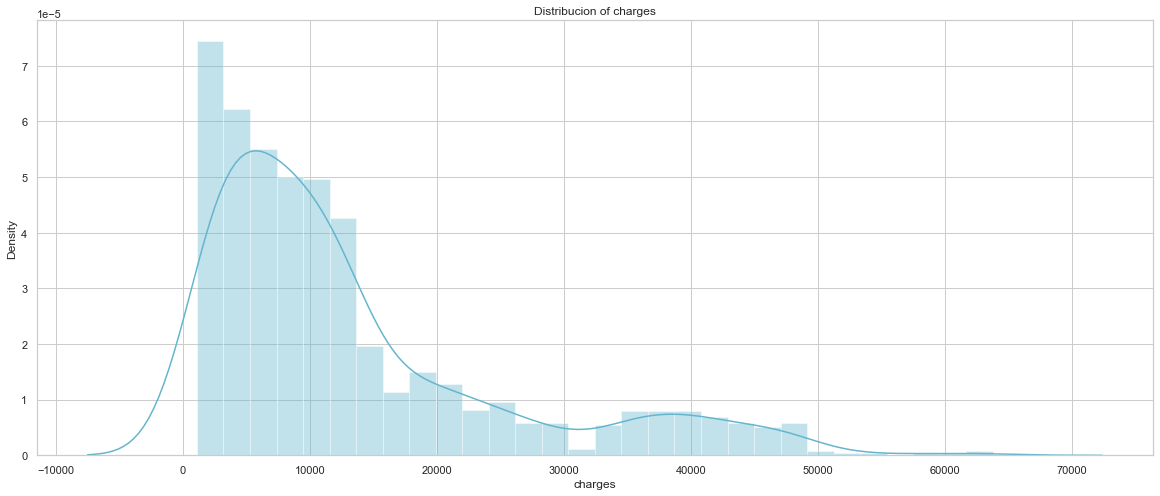

In [10]:
#EDA
#grafico de distribución
sns.set(style='whitegrid')
f, ax=plt.subplots(1,1,figsize=(20,8))
ax = sns.distplot(df['charges'],kde = True, color='c')
plt.title('Distribucion of charges')

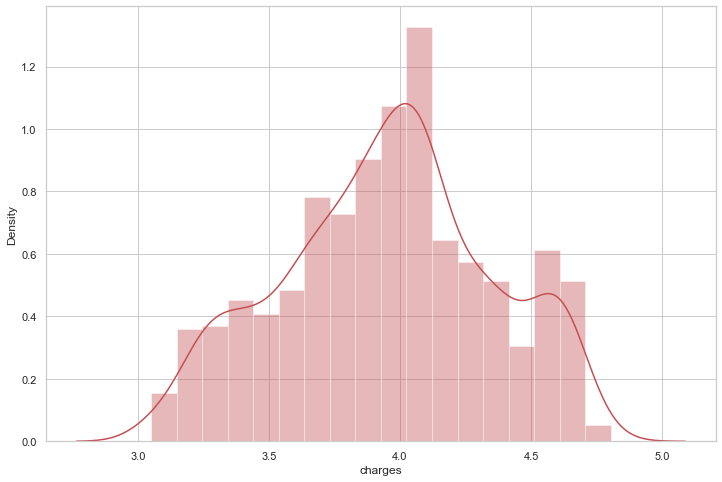

In [11]:
#aplicando logaritmo natural para normalizar esa variable, para no tener la variable sesgada hacia la derecha
f, ax=plt.subplots(1,1, figsize=(12,8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color='r')

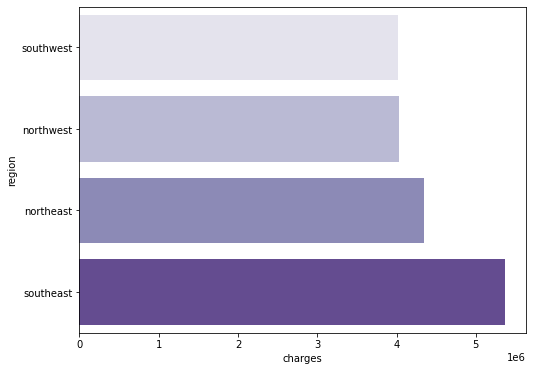

In [7]:
#grafico de barras resumiendo el costo por region
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f,ax = plt.subplots(1,1,figsize=(8,6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Purplesz')

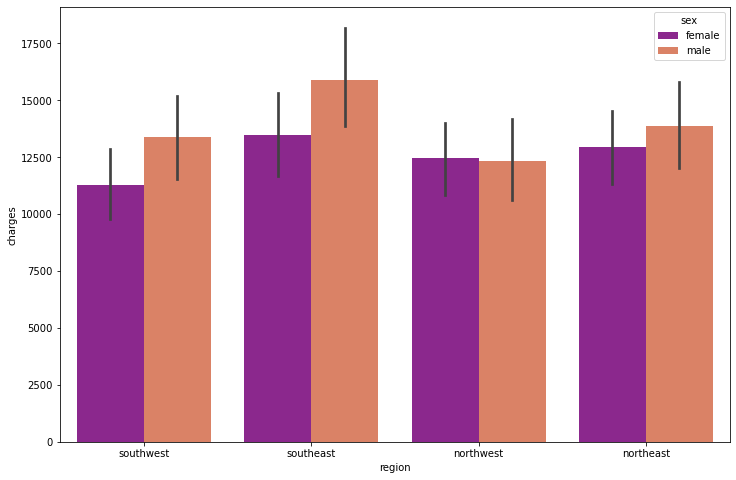

In [10]:
#costo de region por seguro medico por género
f,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='plasma')

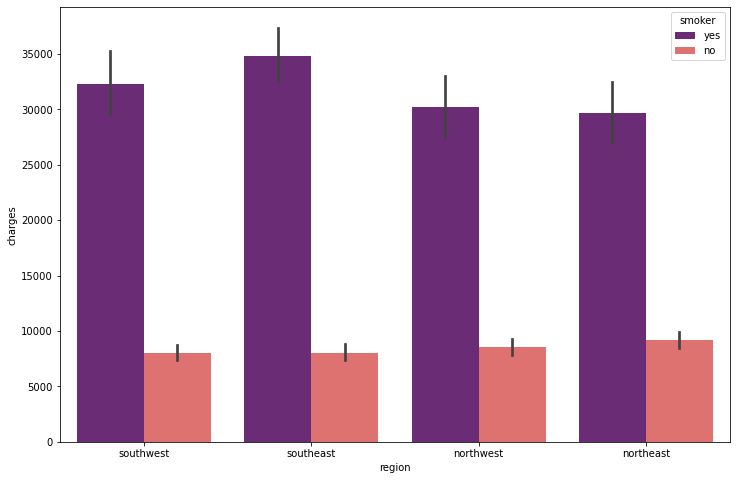

In [11]:
f,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x = 'region', y='charges', hue='smoker', data=df, palette='magma')

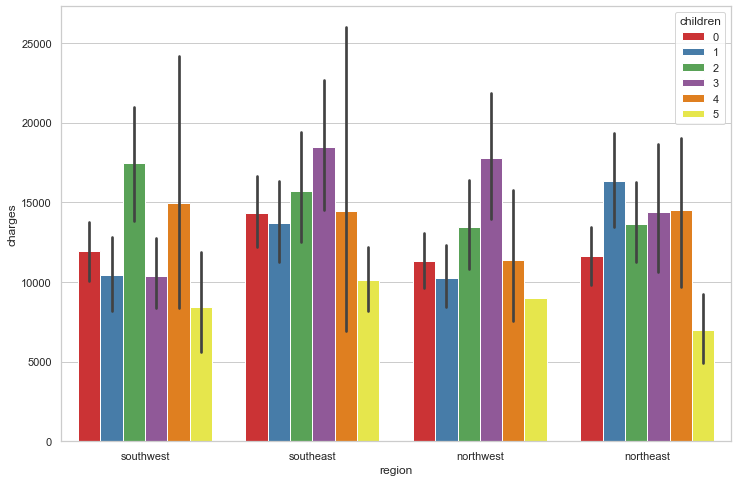

In [19]:
f,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x = 'region', y='charges', hue='children', data=df, palette='Set1')

##Como podemos ver en estos gráficos de barras, los cargos más altos por formar todavia
se encuentran en el sureste, pero los más bajos están en el noreste. Las personas en el
suroeste generalemtne fuman más que las persona en el noreste, pero las personas en el noreste
tienen cargos más altos por género que en el suroeste y el noreste en general. Y las personas con niños
tb tienen a tener costos médicos más altos en general.

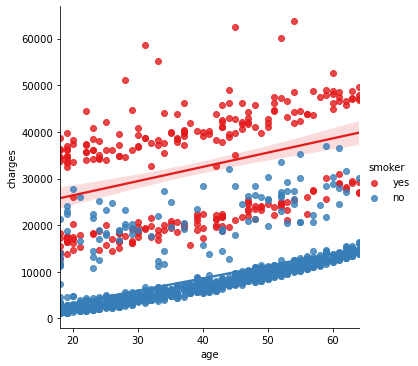

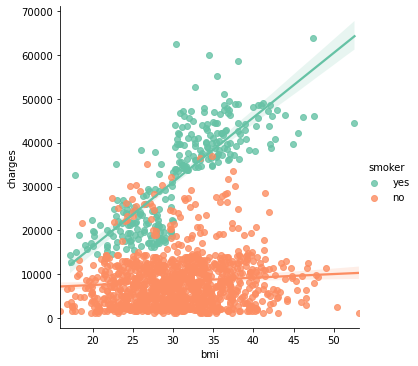

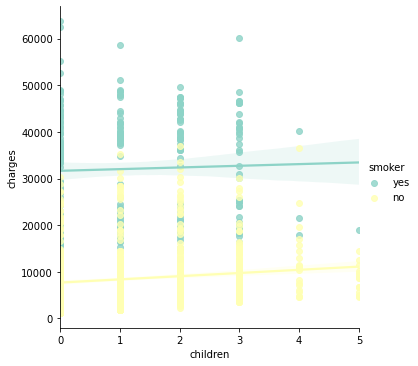

In [12]:
ax=sns.lmplot(x='age', y='charges', data=df, hue='smoker', palette='Set1')
ax=sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='Set2')
ax=sns.lmplot(x='children', y='charges', data=df, hue='smoker', palette='Set3')

In [21]:
df[['sex','smoker', 'region']] = df[['sex','smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [13]:
#convertir las variables categoricas en numericas usando labelencoder

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [34]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


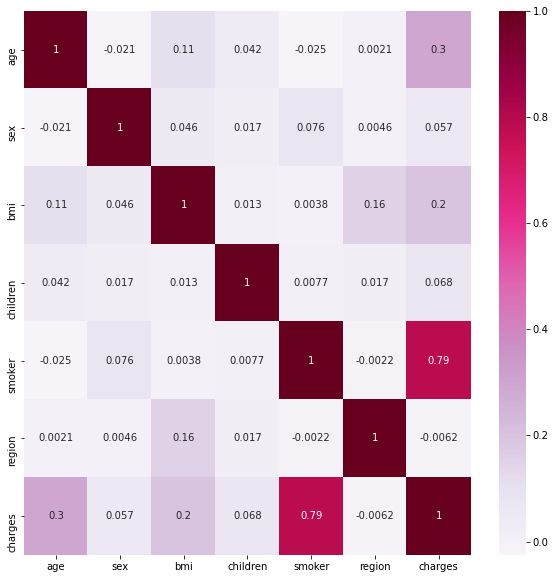

In [14]:
f,ax=plt.subplots(1,1,figsize=(10,10))
ax=sns.heatmap(df.corr(), annot = True, cmap='PuRd')

In [17]:
#Regresión Lineal
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
x=df.drop(['charges'],axis=1)
y=df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)
Lin_reg = LinearRegression()
reg_lineal = Lin_reg.fit(x_train, y_train)
print('Intercepto: %.3f' % Lin_reg.intercept_)
print(Lin_reg.coef_)
print('score: %.3f' %Lin_reg.score(x_test, y_test))

Intercepto: -12429.588
[  263.05837365  -216.1207057    340.76746255   581.34776533
 23790.72408855  -342.37425992]
score: 0.741


In [20]:
import statsmodels.api as sm
modelo_ols = sm.OLS(y_train, x_train)
results1 = modelo_ols.fit()
print(results1.summary())


                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1226.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):                        0.00
Time:                        21:21:26   Log-Likelihood:                         -10890.
No. Observations:                1070   AIC:                                  2.179e+04
Df Residuals:                    1064   BIC:                                  2.182e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
#haciendo la predicciones con el conjunto de prueba
y_pred_lineal = reg_lineal.predict(x_test)
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_lineal))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_lineal))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_lineal)))
#the coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_lineal))

Mean Absolute Error: 4234.888888653847
Mean Squared Error: 39120770.03871333
Root Mean Squared Error: 6254.659865949014
Coefficient of determination: 0.74


In [22]:
#Regresión Ridge
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
model_ridge=Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-12415.422226838022
[  262.99328636  -210.56227475   340.73028375   581.84353849
 23721.63578447  -342.1897827 ]
0.7405990949758086


In [30]:
#haciendo la predicciones con el conjunto de prueba
y_pred_ridge = model_ridge.predict(x_test)
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_ridge))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_ridge))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
#the coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_ridge))

Mean Absolute Error: 3936.645077764159
Mean Squared Error: 31873896.438061953
Root Mean Squared Error: 5645.69716138423
Coefficient of determination: 0.80


In [23]:
#Regresión Lasso
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
model_lasso=Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-12429.441442303221
[  263.0570164   -215.21179275   340.75469863   581.21501816
 23789.39494692  -342.20445873]
0.7406278106359346


In [24]:
#haciendo la predicciones con el conjunto de prueba
y_pred_lasso=model_lasso.predict(x_test)
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_lasso))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_lasso))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
#the coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_lasso))

Mean Absolute Error: 4234.964604689723
Mean Squared Error: 39120447.75420139
Root Mean Squared Error: 6254.634102343749
Coefficient of determination: 0.74


In [25]:
#Random Forest para Regresion
from sklearn.ensemble import RandomForestRegressor as rfr
x=df.drop(['charges'],axis=1)
y=df.charges
Rfr = rfr(n_estimators = 100, criterion='mse',
          random_state = 1,
          n_jobs = -1)
model_rfr = Rfr.fit(x_train, y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: ',metrics.mean_squared_error(x_train_pred, y_train))
print('MSE test data: ' ,metrics.mean_squared_error(x_test_pred, y_test))
print('R2 train data: %.3f, R2 test data: %.3f' %
      (metrics.r2_score(y_train, x_train_pred, y_train),
       metrics.r2_score(y_test, x_test_pred, y_test)))  


MSE train data:  3576308.9529736536
MSE test data:  22245095.945510045
R2 train data: 0.972, R2 test data: 0.827


In [26]:
#haciendo la predicciones con el conjunto de prueba
y_pred_rfr = model_rfr.predict(x_test)
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_rfr))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_rfr))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))
#the coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_rfr))

Mean Absolute Error: 2421.9850166433644
Mean Squared Error: 22245095.94551004
Root Mean Squared Error: 4716.4707086454
Coefficient of determination: 0.85


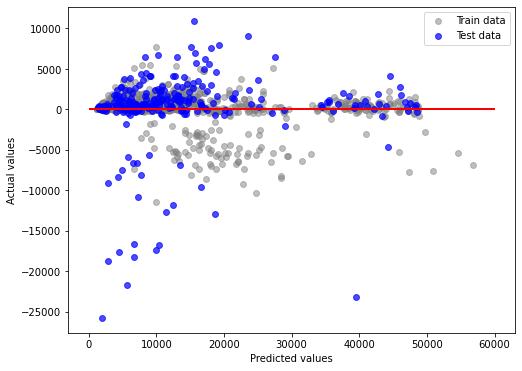

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(x_train_pred, x_train_pred - y_train,
            c='gray', marker='o',s=35,alpha=0.5,
            label='Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
            c='blue', marker='o', s=35, alpha=0.7,
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=0, xmax= 60000, lw=2, color='red')

Feature importance ranking


1.smoker(0.615218)
2.bmi(0.208159)
3.age(0.135585)
4.children(0.020429)
5.region(0.014433)
6.sex(0.006175)


<BarContainer object of 6 artists>

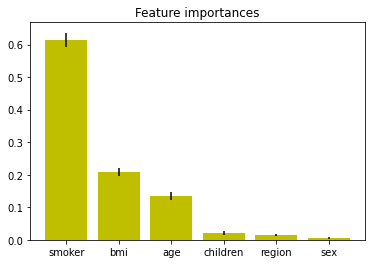

In [28]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age','sex','bmi', 'children','smoker','region']
importance_list=[]
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.% s(%f)" % (f + 1, variable, importances[indices[f]]))

#Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
        color="y", yerr=std[indices], align="center")

In [29]:
#Regresion Polinomial
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis=1)
y = df.charges
pol= PolynomialFeatures (degree=2)
x_pol=pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred=Pol_reg.predict(x_train)
t_test_pred=Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.88170525338
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345221


In [30]:
print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, t_test_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, t_test_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, t_test_pred)))
#the coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, t_test_pred))

Mean Absolute Error: 2824.495045477659
Mean Squared Error: 18895160.09878051
Root Mean Squared Error: 4346.856346692459
Coefficient of determination: 0.88


In [31]:
#Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
#Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268
